# Assignment: Pandas Fundamentals with Earthquake Data

In this assignment, we will review pandas fundamentals, such as how to

- Open csv files
- Manipulate dataframe indexes
- Parse date columns
- Examine basic dataframe statistics
- Manipulate text columns and extract values
- Plot dataframe contents using
  - Bar charts
  - Histograms
  - Scatter plots

First, import Numpy, Pandas and Matplotlib and set the display options.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Data for this assignment in .csv format downloaded from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/) is available at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don't need to download this file. You can open it directly with Pandas.

### 1) Use Pandas' read_csv function directly on this URL to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [3]:
url = "https://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv"
data = pd.read_csv(url)
pd.read_csv(url)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index

Verify that this worked using the `head` and `info` functions.


In [4]:
df = pd.DataFrame(data)
df.info() 
df['time']
df['updated'] 

#'time' and 'updated' are date columns but the results show they are still objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


0         2014-02-05T19:34:41.515Z
1         2014-02-01T01:35:09.000Z
2         2014-02-01T00:03:53.010Z
3         2014-01-31T23:41:25.007Z
4         2014-02-01T00:13:20.107Z
                    ...           
120103    2015-03-24T18:25:07.628Z
120104    2014-12-10T01:04:25.209Z
120105    2014-12-01T01:15:02.814Z
120106    2014-12-10T01:03:01.225Z
120107    2014-12-09T02:04:46.894Z
Name: updated, Length: 120108, dtype: object

In [9]:
df.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [54]:
#date columns: Time and updated
df = pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv", 
                 parse_dates=['time', 'updated'], 
                 index_col='id')
#I ran twice and the results above changed


In [55]:
print(df['time'], df['updated'])

id
ak11155107   2014-01-31 23:53:37.000
nn00436847   2014-01-31 23:48:35.452
ak11151142   2014-01-31 23:47:24.000
ak11151135   2014-01-31 23:30:54.000
ci37171541   2014-01-31 23:30:52.210
                       ...          
ak11453391   2014-12-01 00:10:16.000
ak11453395   2014-12-01 00:09:39.000
nc72358451   2014-12-01 00:09:25.350
ak11453390   2014-12-01 00:05:54.000
ak11453389   2014-12-01 00:04:05.000
Name: time, Length: 120108, dtype: datetime64[ns] id
ak11155107   2014-02-05 19:34:41.515000+00:00
nn00436847          2014-02-01 01:35:09+00:00
ak11151142   2014-02-01 00:03:53.010000+00:00
ak11151135   2014-01-31 23:41:25.007000+00:00
ci37171541   2014-02-01 00:13:20.107000+00:00
                           ...               
ak11453391   2015-03-24 18:25:07.628000+00:00
ak11453395   2014-12-10 01:04:25.209000+00:00
nc72358451   2014-12-01 01:15:02.814000+00:00
ak11453390   2014-12-10 01:03:01.225000+00:00
ak11453389   2014-12-09 02:04:46.894000+00:00
Name: updated, Length: 120108, 

### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [7]:
data.describe() #basic statistics

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,2014-07-05 09:10:37.116720128,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
min,2014-01-01 00:01:16.610000,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,2014-04-08 03:43:10.768999936,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,2014-07-07 10:44:06.035000064,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,2014-09-30 23:36:40.595000064,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,2014-12-31 23:54:33.900000,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000
std,NaN,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046


In [14]:
highest_magnitude = data['mag'].max()
lowest_magnitude = data['mag'].min()
print("Highest Magnitude:", highest_magnitude)
print("Lowest Magnitude:", lowest_magnitude)

Highest Magnitude: 8.2
Lowest Magnitude: -0.97


### 4) Use `nlargest` to get the top 20 earthquakes by magnitude

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

In [15]:
data_20_eq = data.nlargest(20, 'mag')

In [17]:
data_20_eq['place']
print(data_20_eq)
print(data[['place']].head())

                          time  latitude  longitude   depth  mag magType  nst  \
37371  2014-04-01 23:46:47.260  -19.6097   -70.7691   25.00  8.2     mww  NaN   
50562  2014-06-23 20:53:09.700   51.8486   178.7352  109.00  7.9     mww  NaN   
36918  2014-04-03 02:43:13.110  -20.5709   -70.4931   22.40  7.7     mww  NaN   
33808  2014-04-12 20:14:39.300  -11.2701   162.1481   22.56  7.6     mww  NaN   
31496  2014-04-19 13:28:00.810   -6.7547   155.0241   43.37  7.5     mww  NaN   
33537  2014-04-13 12:36:19.230  -11.4633   162.0511   39.00  7.4     mww  NaN   
95913  2014-10-14 03:51:34.460   12.5262   -88.1225   40.00  7.3     mww  NaN   
31850  2014-04-18 14:27:24.920   17.3970  -100.9723   24.00  7.2     mww  NaN   
34318  2014-04-11 07:07:23.130   -6.5858   155.0485   60.53  7.1     mww  NaN   
106285 2014-11-15 02:31:41.720    1.8929   126.5217   45.00  7.1     mww  NaN   
111052 2014-11-01 18:57:22.380  -19.6903  -177.7587  434.00  7.1     mww  NaN   
97602  2014-10-09 02:14:31.4

Examine the structure of the `place` column. The state / country information seems to be in there. How would you get it out?

### 5) Extract the state or country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe called `country`. Note that some of the "countries" are actually U.S. states.

In [18]:
data['place']
#df.join(country)

0         26km S of Redoubt Volcano, Alaska
1                   32km S of Alamo, Nevada
2          12km NNW of North Nenana, Alaska
3                22km S of Cantwell, Alaska
4              10km WNW of Progreso, Mexico
                        ...                
120103            29km SW of Valdez, Alaska
120104     102km SSE of Old Iliamna, Alaska
120105          9km WNW of Cobb, California
120106             57km NW of Ester, Alaska
120107          78km WSW of Cordova, Alaska
Name: place, Length: 120108, dtype: object

In [19]:
countries = df.place.str.split(', ').str[-1]


data['country'] = countries


In [20]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake,Nevada
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake,Alaska
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake,Alaska
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake,Mexico


In [21]:
print(data[['place', 'country']].head())

                               place country
0  26km S of Redoubt Volcano, Alaska  Alaska
1            32km S of Alamo, Nevada  Nevada
2   12km NNW of North Nenana, Alaska  Alaska
3         22km S of Cantwell, Alaska  Alaska
4       10km WNW of Progreso, Mexico  Mexico


### 6) Display each unique value from the new column

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html

In [22]:
unique_eq = data['country'].unique()
print(unique_eq)

['Alaska' 'Nevada' 'Mexico' 'California' 'Papua New Guinea' 'New Zealand'
 'Missouri' 'South of the Fiji Islands' 'Montana' 'British Virgin Islands'
 'Washington' 'Oregon' 'Canada' 'Fiji' 'Wyoming' 'Antarctica' 'Chile'
 'Utah' 'Indonesia' 'Solomon Islands' 'Micronesia' 'Oklahoma' 'Hawaii'
 'Russia' 'Arizona' 'Philippines' 'Bolivia' 'Greece' 'Japan' 'Puerto Rico'
 'Iran' 'Tonga' 'Wallis and Futuna' 'Colorado' 'Guam' 'CA'
 'Carlsberg Ridge' 'Idaho' 'Pakistan'
 'Off the west coast of northern Sumatra' 'Burma' 'China' 'Peru'
 'Off the east coast of the North Island of New Zealand' 'Costa Rica'
 'Reykjanes Ridge' 'East Timor' 'Central East Pacific Rise'
 'Mid-Indian Ridge' 'Japan region' 'Northern Mariana Islands'
 'El Salvador' 'Samoa' 'Northern Mid-Atlantic Ridge' 'Taiwan' 'Arkansas'
 'South Sandwich Islands' 'Colombia' 'Dominican Republic' 'Argentina'
 'Texas' 'New Hampshire' 'Saint Helena' 'West of Vancouver Island'
 'Tanzania' 'Vanuatu' 'Bosnia and Herzegovina' 'India' 'American Samoa'

### 7) Create a filtered dataset that only has earthquakes of magnitude 4 or larger and

In [24]:
filtered_data_eq = data[data['mag'] >= 4] #magnitude exceeds 4 or more
print(filtered_data_eq.head())

                      time  latitude  longitude   depth  mag magType  nst  \
10 2014-01-31 23:08:03.660   -4.9758   153.9466  110.18  4.2      mb  NaN   
14 2014-01-31 22:54:32.970  -28.1775  -177.9058   95.84  4.3      mb  NaN   
16 2014-01-31 22:49:49.740  -23.1192   179.1174  528.34  4.4      mb  NaN   
26 2014-01-31 22:19:44.330   51.1569  -178.0910   37.50  4.2      mb  NaN   
31 2014-01-31 21:56:44.320   -4.8800   153.8434  112.66  4.3      mb  NaN   

      gap   dmin   rms net          id                   updated  \
10   98.0  1.940  0.61  us  usc000mqlp 2014-04-08 01:43:19+00:00   
14  104.0  1.063  1.14  us  usc000mqln 2014-04-08 01:43:19+00:00   
16   80.0  5.439  0.95  us  usc000mqls 2014-04-08 01:43:19+00:00   
26    NaN    NaN  0.83  us  usc000mf1x 2014-04-08 01:43:19+00:00   
31  199.0  1.808  0.79  us  usc000mqlm 2014-04-08 01:43:19+00:00   

                                   place        type  \
10  115km ESE of Taron, Papua New Guinea  earthquake   
14  120km N of R

### 8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes

Location name on the x axis, Earthquake count on the y axis

Text(0, 0.5, 'Number')

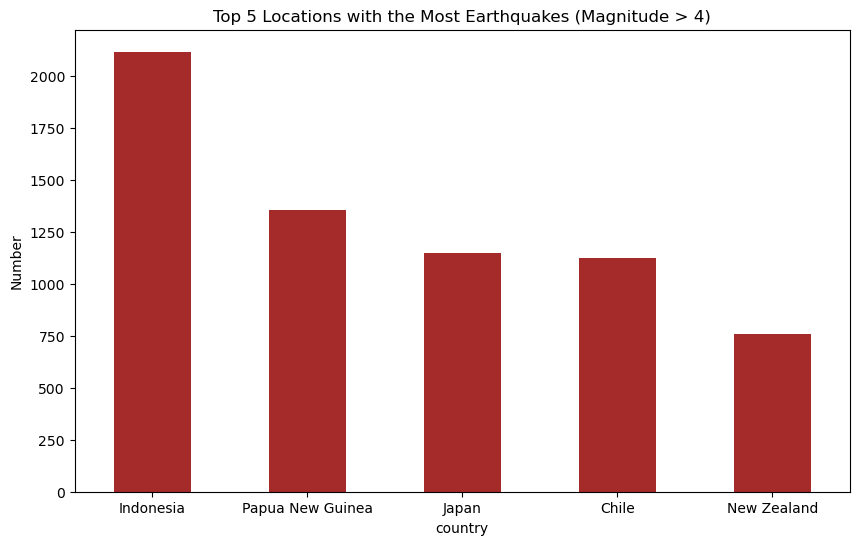

In [25]:
#filtered dataset: filtered_data_eq
counts = filtered_data_eq['country'].value_counts()

#top 5 locations
fig, ax = plt.subplots()
top_5 = counts.head(5)
top_5.plot(figsize=(10, 6), kind='bar', color='brown')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Top 5 Locations with the Most Earthquakes (Magnitude > 4)')
ax.set_xlabel('country')
ax.set_ylabel('Number')

### 9) Make a histogram the distribution of the Earthquake magnitudes

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Do one subplot for the filtered and one for the unfiltered dataset.
Use a Logarithmic scale. What sort of relationship do you see?

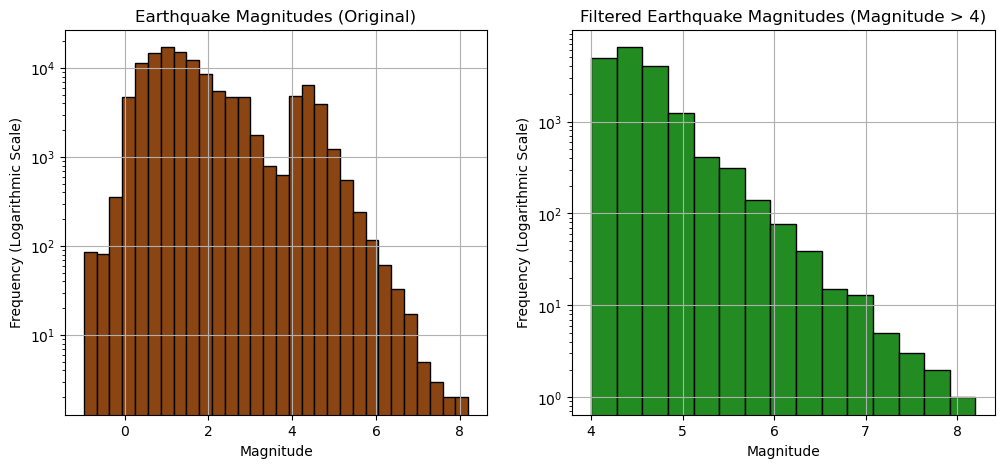

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

#origin magnitude data
data['mag'].hist(ax=axes[0], bins=30, color='saddlebrown', grid=True, edgecolor = 'black')
axes[0].set_title('Earthquake Magnitudes (Original)')
axes[0].set_xlabel('Magnitude')
axes[0].set_ylabel('Frequency (Logarithmic Scale)')
axes[0].set_yscale('log') 

#filtered
filtered_data_eq['mag'].hist(ax=axes[1], bins=15, color='forestgreen', grid=True, edgecolor = 'black')
axes[1].set_title('Filtered Earthquake Magnitudes (Magnitude > 4)')
axes[1].set_xlabel('Magnitude')
axes[1].set_ylabel('Frequency (Logarithmic Scale)')
axes[1].set_yscale('log')

# Smaller magnitudes are illustrated more in the original unfiltered graph.There are fewer occurrences of high-magnitude events in the graph with the original data. 
# The frequency is relatively lower when the magnitude exceeds 4, reflecting the less frequent but more intense seismic events.
#This shows a seismic data distribution which is that the frequency of earthquakes decreases as the magnitude increases

### 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude

Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty

What difference do you note between the filtered and unfiltered datasets?

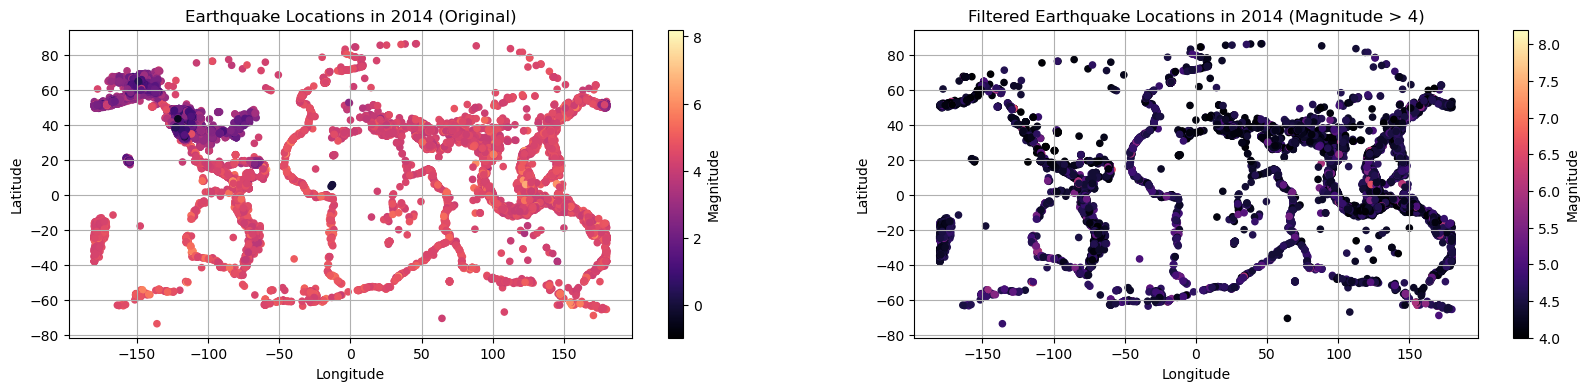

In [75]:

fig, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))


#original
scatter1 = ax2[0].scatter(data['longitude'], data['latitude'], c=data['mag'], cmap='magma', s=20)
ax2[0].set_title('Earthquake Locations in 2014 (Original)')
ax2[0].set_xlabel('Longitude')
ax2[0].set_ylabel('Latitude')
ax2[0].grid(True)
plt.colorbar(scatter1, ax=ax2[0], orientation='vertical', label='Magnitude')

#filtered
scatter2 = ax2[1].scatter(filtered_data_eq['longitude'], filtered_data_eq['latitude'], c=filtered_data_eq['mag'], cmap='magma', s=20)
ax2[1].set_title('Filtered Earthquake Locations in 2014 (Magnitude > 4)')
ax2[1].set_xlabel('Longitude')
ax2[1].set_ylabel('Latitude')
ax2[1].grid(True)
plt.colorbar(scatter2, ax=ax2[1], orientation='vertical', label='Magnitude')


# These two maps reflect all the records of earthquakes around the world. Earthquakes happen in lines and cracks throught the time.
# The most significant difference is the locations where the magnitude is below 2.
# There are some locations that are rather stable. Where the magnitude is below 2 are the west-north coast of North America and a small central part netween Canada and the US.



In [ ]:
#I also made the scatter plot with a map underneath, which could be much clearer to identify the locations and distributions.
# According to the map plot, earthquakes tend to occur along major tectonic plate boundaries and fault lines, 
#such as the Pacific Ring of Fire, the Mid-Atlantic Ridge, and the Alpine-Himalayan belt. 

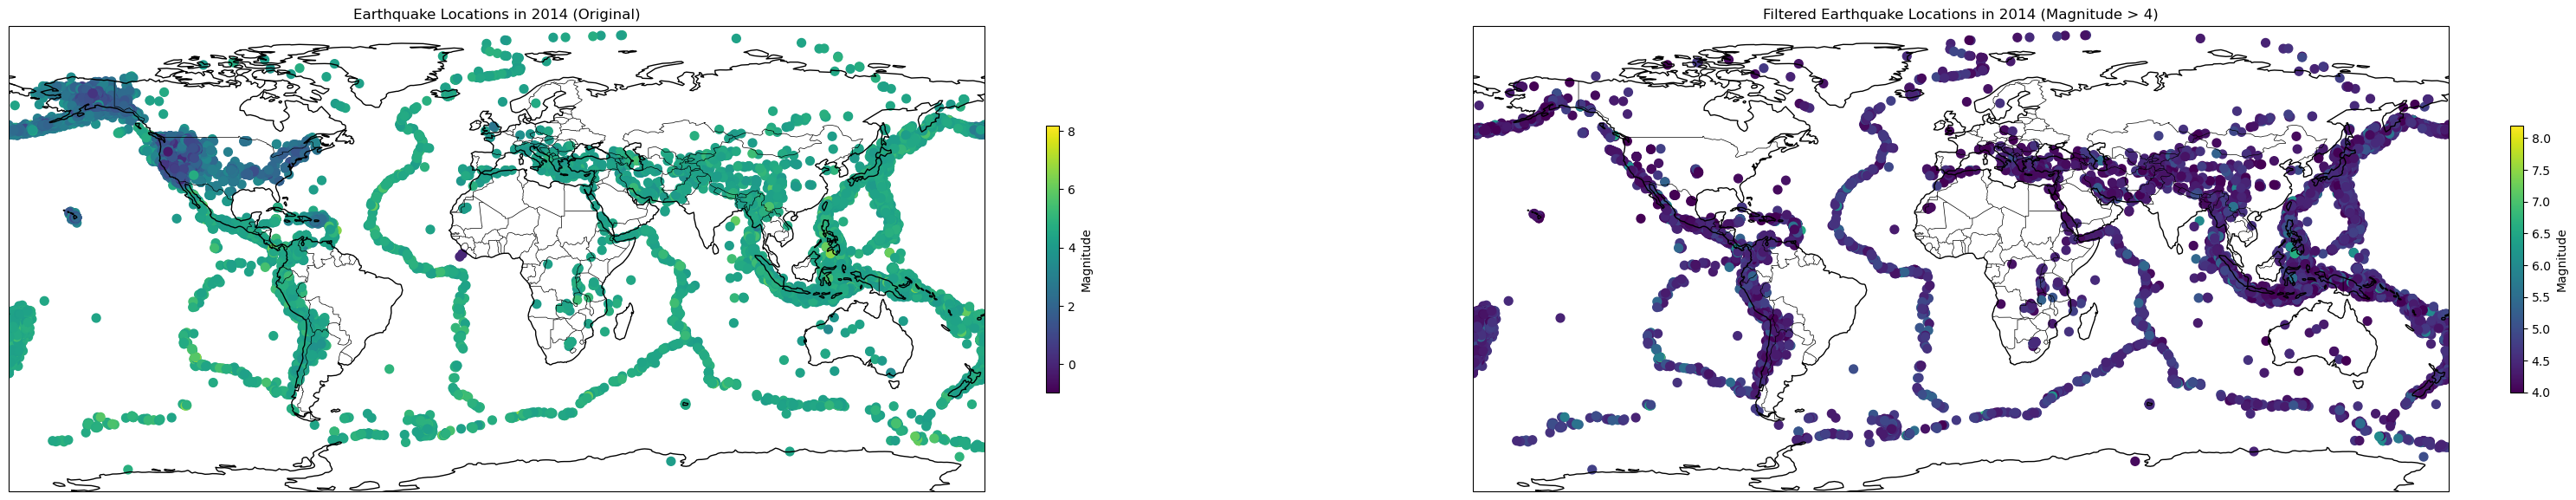

In [58]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature


fig, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})

for ax in ax2:
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)

scatter1 = ax2[0].scatter(data['longitude'], data['latitude'], c=data['mag'], cmap='viridis', s=50, transform=ccrs.PlateCarree())
ax2[0].set_title('Earthquake Locations in 2014 (Original)')
ax2[0].set_xlabel('Longitude')
ax2[0].set_ylabel('Latitude')
ax2[0].grid(True)
plt.colorbar(scatter1, ax=ax2[0], orientation='vertical', label='Magnitude', shrink=0.1)

scatter2 = ax2[1].scatter(filtered_data_eq['longitude'], filtered_data_eq['latitude'], c=filtered_data_eq['mag'], cmap='viridis', s=50, transform=ccrs.PlateCarree())
ax2[1].set_title('Filtered Earthquake Locations in 2014 (Magnitude > 4)')
ax2[1].set_xlabel('Longitude')
ax2[1].set_ylabel('Latitude')
ax2[1].grid(True)
plt.colorbar(scatter2, ax=ax2[1], orientation='vertical', label='Magnitude', shrink=0.1)

plt.show()
